In [1]:
#setup
!pip install torch torchvision torchaudio
!pip install matplotlib numpy pillow tqdm scikit-image

In [3]:
#libraries import
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [4]:
#define paths
base_dir = '/content/drive/MyDrive/project_datasets/CT to MRI brain images/images'

trainA_path = os.path.join(base_dir, 'trainA')  # Train CT
trainB_path = os.path.join(base_dir, 'trainB')  # Train MRI
testA_path  = os.path.join(base_dir, 'testA')   # CT test
testB_path  = os.path.join(base_dir, 'testB')   # MRI test

In [5]:
#creating the datset class for pytorch
class CustomDataset(Dataset):
  def __init__(self, root_dir, image_size=256):
        self.root_dir = root_dir
        self.image_files = os.listdir(root_dir)
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),  # converts to [0,1]
            transforms.Normalize((0.5,), (0.5,))  # normalize to [-1,1]
        ])

  def __len__(self):
        return len(self.image_files)

  def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        return self.transform(image)

In [15]:
#dataloader
image_size = 256
batch_size = 4

trainA_dataset = CustomDataset(trainA_path, image_size)
trainB_dataset = CustomDataset(trainB_path, image_size)

trainA_loader = DataLoader(trainA_dataset, batch_size=batch_size, shuffle=True)
trainB_loader = DataLoader(trainB_dataset, batch_size=batch_size, shuffle=True)

In [16]:
#Visualization of sample images

#function to show images
def show_images(ct_batch, mri_batch, n=4):
    plt.figure(figsize=(10,4))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow((ct_batch[i].permute(1,2,0)*0.5 + 0.5).numpy())
        plt.title("CT Image")
        plt.axis("off")

        plt.subplot(2, n, n+i+1)
        plt.imshow((mri_batch[i].permute(1,2,0)*0.5 + 0.5).numpy())
        plt.title("MRI Image")
        plt.axis("off")
    plt.show()


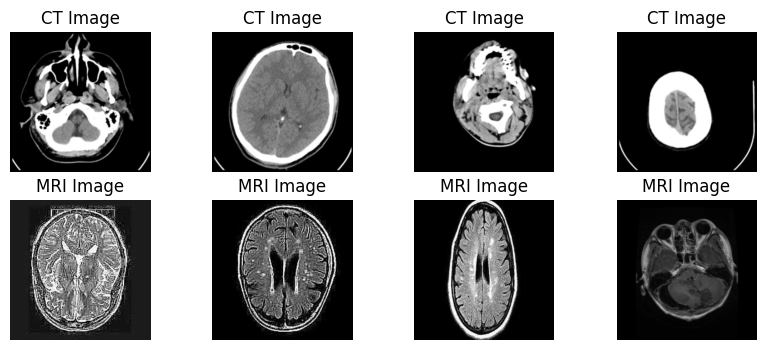

In [17]:
ct_batch = next(iter(trainA_loader))
mri_batch = next(iter(trainB_loader))
show_images(ct_batch, mri_batch)

In [18]:
#save preproccessed data
torch.save(ct_batch, '/content/drive/MyDrive/project_datasets/CT to MRI brain images/preprocessed_ct.pt')
torch.save(mri_batch, '/content/drive/MyDrive/project_datasets/CT to MRI brain images/preprocessed_mri.pt')
